In [1]:
import pandas as pd
import numpy as np
import shared
import json
import joblib

ve_or_ju = "ju"

In [2]:
with open(f"data/top_countries_{ve_or_ju}.json") as json_file:
    top_countries = json.load(json_file)
top_countries    

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'DEN',
 'GER',
 'FRA',
 'ESP',
 'CZE',
 'POL',
 'ITA',
 'USA',
 'UKR',
 'HUN']

In [3]:
with open(f"data/top_first_names_{ve_or_ju}.json") as json_file:
    top_first_names = json.load(json_file)
top_first_names 

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'johan',
 'anders',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'petteri',
 'jouko',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'niko',
 'samuli',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'reijo',
 'daniel',
 'martti',
 'kai',
 'jarno',
 'raimo',
 'panu',
 'stefan',
 'thomas',
 'keijo',
 'magnus',
 'per',
 'simon',
 'sakari',
 'pen

In [4]:
history = pd.read_csv('data/grouped_paces_ju.tsv', delimiter="\t")
history.head()

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,pace_7
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,5.762,6.251,5.843,5.796,NaN,NaN
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,5.621,6.100,5.977,7.164,5.642,5.974
2,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,lauri sild,7,7,5.933,0.382,2,FIN,5.836,5.851,5.996,5.829,6.765,5.391,5.866
3,18.0,OK ORION;KOOVEE,oleksandr kratov,3,3,6.069,0.363,4,SWE,5.703,5.940,6.563,NaN,NaN,NaN,NaN
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,5.662,5.837,6.014,6.562,NaN,NaN


In [5]:
# HISTORY: ""mean_team_id"	"teams"	"name"	"num_runs"	"num_valid_times"	"mean_pace"	"stdev"	"most_common_leg"	"most_common_country"	
# "pace_1"	"pace_2"	"pace_3"	"pace_4"	"pace_5"	"pace_6"	"pace_7"
# RUNS: "team"	"team_country"	"pace"	"leg_nro"	"num_runs"
history["year"] = "NA"
history["pace"] = "NA"
history["team"] = "NA"
history["leg_nro"] = history["most_common_leg"]
history["team_id"] = history["mean_team_id"]
history["team_country"] = history["most_common_country"]






In [6]:
history[history["num_runs"] > 4]

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,pace_4,pace_5,pace_6,pace_7,year,pace,team,leg_nro,team_id,team_country
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,...,5.843,5.796,NaN,NaN,NA,NA,NA,1,18.5,FIN
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,...,5.977,7.164,5.642,5.974,NA,NA,NA,1,12.0,FIN
2,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,lauri sild,7,7,5.933,0.382,2,FIN,5.836,...,5.829,6.765,5.391,5.866,NA,NA,NA,2,3.0,FIN
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,...,6.014,6.562,NaN,NaN,NA,NA,NA,7,21.0,FIN
5,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,timo sild,7,7,5.630,0.335,6,FIN,5.526,...,5.378,6.293,5.346,5.748,NA,NA,NA,6,3.0,FIN
6,5.5,KOOVEE;KRISTIANSAND OK,daniel hubmann,6,6,5.646,0.520,7,FIN,5.294,...,5.172,6.752,5.432,NaN,NA,NA,NA,7,5.5,FIN
8,12.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,5,5,6.117,0.449,2,SWE,5.794,...,6.571,6.728,NaN,NaN,NA,NA,NA,2,12.0,SWE
9,9.0,IFK GÖTEBORG,vetle ruud bråten,5,5,5.705,0.185,3,SWE,5.525,...,5.615,6.060,NaN,NaN,NA,NA,NA,3,9.0,SWE
10,16.0,IFK GÖTEBORG,jonas pilblad,6,6,6.154,0.389,2,SWE,6.509,...,6.819,5.756,6.089,NaN,NA,NA,NA,2,16.0,SWE
11,85.5,NYKÖPINGS OK;IFK GÖTEBORG,jens wängdahl,6,5,6.181,0.341,3,SWE,5.826,...,6.195,6.600,NaN,NaN,NA,NA,NA,3,85.5,SWE


In [7]:
features = shared.preprocess_features(history, top_countries, top_first_names)
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 22 columns):
mean_team_id           30755 non-null float64
teams                  30755 non-null object
name                   30755 non-null object
num_runs               30755 non-null int64
num_valid_times        30755 non-null int64
mean_pace              28895 non-null float64
stdev                  28895 non-null float64
most_common_leg        30755 non-null int64
most_common_country    30361 non-null object
pace_1                 28895 non-null float64
pace_2                 16336 non-null float64
pace_3                 11541 non-null float64
pace_4                 8326 non-null float64
pace_5                 5925 non-null float64
pace_6                 3827 non-null float64
pace_7                 1671 non-null float64
year                   30755 non-null object
pace                   30755 non-null object
team                   30755 non-null object
leg_nro                30755 non-

None

,team_id,team_id_log10,leg_1,leg_2,leg_3,leg_4,leg_5,leg_6,leg_7,c_CZE,...,fn_viktor,fn_vili,fn_ville,fn_visa,fn_vladimir,fn_väinö,fn_william,fn_yrjö,fn_öystein,fn_öyvind
0,18.5,1.267172,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,1.079181,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,0.477121,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.0,1.255273,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,1.322219,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.0,0.477121,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5.5,0.740363,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8.5,0.929419,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12.0,1.079181,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9.0,0.954243,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x = features.values
x.shape

(30755, 490)

In [9]:

#pmlearn_linear = joblib.load('pmlearn_linear.sav')
gbr = joblib.load('gbr.sav')
gbr_q_low = joblib.load('gbr_q_low.sav')
gbr_q_high = joblib.load('gbr_q_high.sav')


In [10]:
#pmlearn_preds = pmlearn_linear.predict(features, return_std=True)
gbr_preds = gbr.predict(features)
gbr_q_low_preds = gbr_q_low.predict(features)
gbr_q_high_preds = gbr_q_high.predict(features)

In [11]:
gbr_preds

array([1.81103097, 1.77006833, 1.80048369, ..., 1.83846888, 1.86759701,
       1.84805425])

In [12]:
gbr_sd_estimate = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

# Propably unjustified way to estimate standard deviation
gbr_sd_estimate["std"] = (gbr_sd_estimate.q_high - gbr_sd_estimate.q_low) / 2

display(gbr_sd_estimate.head(15).round(3))
display(gbr_sd_estimate["std"].mean())


,q_low,predicted,q_high,std
0,5.838,6.117,6.780,0.471
1,5.721,5.871,6.434,0.357
2,5.690,6.053,6.479,0.394
3,5.759,6.513,7.443,0.842
4,5.664,6.051,6.876,0.606
5,5.423,5.762,6.466,0.521
6,5.636,5.914,6.836,0.600
7,5.702,6.206,6.734,0.516
8,5.660,6.135,6.746,0.543
9,5.659,6.023,6.820,0.581


1.9674727885211538

In [13]:
#history['prior_mean'] = np.exp(pmlearn_preds[0])
#history['prior_std'] = np.exp(pmlearn_preds[1])
history['prior_mean'] = gbr_sd_estimate["predicted"]
history['prior_std'] = gbr_sd_estimate["std"]


In [14]:
history['prior_mean_error'] = np.abs(history['prior_mean'] - history['mean_pace'])
display(np.mean(history['prior_mean_error']))
history['prior_mean_error_in_sd'] = history['prior_mean_error'] / history['prior_std']
display(np.mean(history['prior_mean_error_in_sd']))
display(np.mean(np.abs(history['prior_std'] - history['stdev'])))

1.382005998749337

0.6939444477282392

1.453240943003158

In [15]:
history.head(5)

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,year,pace,team,leg_nro,team_id,team_country,prior_mean,prior_std,prior_mean_error,prior_mean_error_in_sd
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,...,NA,NA,NA,1,18.5,FIN,6.116750,0.470650,0.211750,0.449910
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,...,NA,NA,NA,1,12.0,FIN,5.871255,0.356571,0.179745,0.504095
2,3.0,DELTA;KOOVEE;HIIDENKIERTÄJÄT,lauri sild,7,7,5.933,0.382,2,FIN,5.836,...,NA,NA,NA,2,3.0,FIN,6.052574,0.394388,0.119574,0.303190
3,18.0,OK ORION;KOOVEE,oleksandr kratov,3,3,6.069,0.363,4,SWE,5.703,...,NA,NA,NA,4,18.0,SWE,6.513263,0.841791,0.444263,0.527759
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,...,NA,NA,NA,7,21.0,FIN,6.051477,0.605963,0.115477,0.190567


In [16]:
history[['num_valid_times', "stdev", "prior_mean_error", "prior_std", "prior_mean_error_in_sd"]].groupby('num_valid_times').agg("mean").round(2)


,stdev,prior_mean_error,prior_std,prior_mean_error_in_sd
num_valid_times,,,,
0,NaN,NaN,2.27,NaN
1,0.00,1.77,2.18,0.83
2,0.89,1.44,2.01,0.71
3,1.06,1.14,1.86,0.59
4,1.13,1.04,1.75,0.58
5,1.13,0.88,1.65,0.51
6,1.07,0.77,1.51,0.49
7,1.02,0.69,1.41,0.47
8,1.17,0.66,1.50,0.45


In [17]:
history[['num_valid_times', "stdev"]].groupby('num_valid_times').agg("std").round(2)

,stdev
num_valid_times,
0,NaN
1,0.00
2,0.94
3,0.83
4,0.80
5,0.73
6,0.62
7,0.58
8,0.67


In [18]:

#runner_preds = history[np.logical_and(history['teams'].str.contains("RE"), history["num_valid_times"] > 1)] 
runner_preds = history.loc[
    (history['teams'].str.contains("ON") |history['teams'].str.contains("ESPOON SUUNTA")) & 
    (history["num_valid_times"] >= 1)] 
#runner_preds = history[np.isfinite(history["pace_7"])] 
#runner_preds = history[history["num_valid_times"] > 4] 

display(runner_preds[["name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_std"]])
##runner_preds runner_preds = history[np.isfinite(history["pace_7"])] 

paces = runner_preds[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]
paces.shape

,name,num_valid_times,mean_pace,stdev,prior_mean,prior_std
3,oleksandr kratov,3,6.069,0.363,6.513263,0.841791
14,daniel stenlund,6,6.174,0.615,6.241357,0.542083
15,jesse laukkarinen,6,6.156,0.521,6.074474,0.555441
16,fredric portin,5,5.931,0.288,6.174487,0.547554
17,vili niemi,7,6.042,0.422,6.044503,0.500378
18,bartosz pawlak,5,5.986,0.805,6.157538,0.676002
19,frédéric tranchand,1,5.179,0.000,6.147510,0.797023
20,olav lundanes,5,5.703,0.410,5.956428,0.578769
36,markus räsänen,5,6.655,0.674,7.381314,0.809774
75,karl fremstad,4,6.472,0.478,6.281091,0.952137


(3227, 7)

In [19]:
history[["stdev", "prior_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

,stdev,prior_std
count,28895.000000,30755.000000
mean,0.579511,1.967473
std,0.791137,0.783933
min,0.000000,0.216731
5%,0.000000,0.850411
25%,0.000000,1.376901
50%,0.306000,1.855729
75%,0.931000,2.462429
95%,2.020300,3.477683
99%,3.452120,3.924556


In [20]:
log_stds = np.clip(np.log(runner_preds["prior_std"]), 0.1, 1.3).values
#log_stds = np.log(runner_preds["prior_std"] + 0.7).values
np.min(log_stds)

0.1

In [21]:
import multiprocessing
multiprocessing.cpu_count()

12

In [22]:
J=np.log(paces).T.shape
display(J)
import pymc3 as pm
with pm.Model() as hierarchial:
    mu = pm.Normal('mu', mu=np.log(runner_preds["prior_mean"]).values, sd=log_stds, shape=J[1])
    # Please fix sigma, 
    sigma = pm.Lognormal('sigma',mu=log_stds, sd=0.35, shape=J[1])
    
    eta = pm.Normal('eta', 0, 1)
    tau = pm.HalfCauchy('tau', beta=5,shape=J[1])
    #theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
    theta = pm.Deterministic('theta', mu + tau*eta)
    obs = pm.Normal('obs', mu=theta, sd=sigma, observed=np.log(paces).T)

(7, 3227)

/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/pymc3/model.py:1266: UserWarning: Data in obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[

In [23]:

with hierarchial:
    nuts_args = {
        "target_accept": 0.9
    }
    short_trace = pm.sample(3000, n_init=3000, tune=5000, random_seed=2019, 
                            cores= multiprocessing.cpu_count() -1, 
                            chains=4,
                            nuts_kwargs=nuts_args)
   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-pack

In [24]:
#pm.summary(short_trace).round(2)
#np.exp(pm.summary(short_trace)[["mean", "sd"]]).round(3)

In [25]:
#history[np.logical_and(history['num_valid_times'] >= 7, np.isnan(history["pace_7"]))][["name", "num_valid_times"]] 

In [26]:
#runner_preds["predicted_pace"] = np.exp(np.mean(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_pace = np.exp(np.mean(short_trace["mu"], axis=0)))
runner_preds = runner_preds.assign(predicted_pace_std = np.exp(np.std(short_trace["mu"], axis=0)))
runner_preds = runner_preds.assign(predicted_pace_sigma = np.exp(np.mean(short_trace["sigma"], axis=0)))

# 3.5 is a bit unjustified but we dont want to predict too wide interval
runner_preds["predicted_pace_sigma_fix"] = np.clip(runner_preds["predicted_pace_sigma"], 0.5, 3.5)
runner_preds["pred_pace_error"] = np.abs(runner_preds["predicted_pace"] - runner_preds["mean_pace"])
runner_preds["pred_pace_error_in_sigma"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_sigma_fix"]
runner_preds["pred_pace_error_in_std"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_std"]


In [27]:
display(runner_preds[["mean_team_id", "name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_std", 
                "predicted_pace", "pred_pace_error", "predicted_pace_std", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "pred_pace_error_in_std"]
                    ][runner_preds['teams'].str.contains("REAK")].round(2))



,mean_team_id,name,num_valid_times,mean_pace,stdev,prior_mean,prior_std,predicted_pace,pred_pace_error,predicted_pace_std,predicted_pace_sigma_fix,pred_pace_error_in_sigma,pred_pace_error_in_std
3514,869.0,matti peltonen,2,8.86,0.67,10.24,1.40,9.99,1.13,1.36,3.29,0.34,0.83
3797,1491.0,mika ovaskainen:REAKTOR INNOVATIONS,1,10.70,0.00,11.32,3.90,11.24,0.54,3.30,3.50,0.15,0.16
3981,1491.0,jari järvinen:REAKTOR INNOVATIONS,1,12.74,0.00,12.83,3.16,13.02,0.28,2.89,3.50,0.08,0.10
4165,672.0,mikko peltonen:REAKTOR INNOVATIONS,7,8.85,0.70,9.16,1.23,9.01,0.15,1.16,1.81,0.08,0.13
4169,567.0,pasi huhtiniemi,7,9.16,0.65,9.06,1.04,9.08,0.08,1.09,1.69,0.05,0.07
4170,672.0,joni freeman,7,8.33,1.00,8.59,1.43,8.41,0.08,1.24,2.05,0.04,0.07
4171,672.0,tuomas kareinen,7,10.05,1.49,9.70,1.45,9.85,0.20,1.25,2.09,0.10,0.16
4172,532.0,janne vaittinen,3,11.10,1.28,10.21,2.02,10.53,0.58,1.71,3.50,0.16,0.34
4173,429.0,olavi kanerva,1,7.41,0.00,11.21,1.81,10.56,3.15,1.74,3.50,0.90,1.81
4174,672.0,jyri kytömäki,5,10.69,0.52,9.62,1.34,10.06,0.63,1.25,2.28,0.27,0.50


In [28]:
cleanned_up_preds = runner_preds[
    ["mean_team_id", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_std", 
     "predicted_pace", "pred_pace_error", "predicted_pace_sigma_fix", "predicted_pace_std", "name", "teams"]].round(3)
cleanned_up_preds.to_csv(f"data/preds_for_runners_with_history_{ve_or_ju}.csv", sep='\t')

In [29]:
display(np.mean(runner_preds['prior_mean_error']))
display(np.mean(runner_preds["predicted_pace_sigma_fix"]))
display(np.mean(runner_preds["pred_pace_error_in_sigma"]))
display(np.mean(runner_preds["predicted_pace_std"]))
display(np.mean(runner_preds["pred_pace_error_in_std"]))
np.mean(runner_preds["pred_pace_error"])

1.3930460005281995

3.128244628223603

0.30839256439561596

1.7761253065434057

0.5415570407378655

1.0120749956674109

In [30]:
display(np.mean(runner_preds["prior_std"]/runner_preds["predicted_pace_sigma_fix"]))
runner_preds[["predicted_pace_sigma", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

0.6334240371922265

,predicted_pace_sigma,predicted_pace_sigma_fix,pred_pace_error_in_sigma,predicted_pace_std,pred_pace_error_in_std
count,3227.000000,3227.000000,3227.000000,3227.000000,3227.000000
mean,7.134554,3.128245,0.308393,1.776125,0.541557
std,6.859792,0.575919,0.365463,0.572939,0.638349
min,1.680585,1.680585,0.000014,1.089534,0.000028
5%,1.867969,1.867969,0.019141,1.100116,0.037591
25%,2.816432,2.816432,0.089816,1.318444,0.165865
50%,4.530474,3.500000,0.199775,1.638281,0.364795
75%,8.469585,3.500000,0.383878,2.109395,0.687595
95%,22.342768,3.500000,0.981331,2.943717,1.622915
99%,33.426947,3.500000,1.899610,3.308335,3.101851


In [31]:
runner_preds[
    ['num_valid_times', "prior_mean_error", "prior_std", "prior_mean_error_in_sd", "pred_pace_error", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std"]
].groupby('num_valid_times').agg(["mean"]).round(2)

,prior_mean_error,prior_std,prior_mean_error_in_sd,pred_pace_error,predicted_pace_sigma_fix,pred_pace_error_in_sigma,predicted_pace_std,pred_pace_error_in_std
,mean,mean,mean,mean,mean,mean,mean,mean
num_valid_times,,,,,,,,
1,1.91,2.34,0.86,1.65,3.46,0.47,2.17,0.79
2,1.59,2.13,0.74,1.17,3.41,0.34,1.89,0.61
3,1.21,1.97,0.62,0.78,3.25,0.24,1.68,0.47
4,1.04,1.84,0.55,0.55,3.09,0.18,1.53,0.35
5,0.89,1.68,0.51,0.42,2.72,0.16,1.40,0.30
6,0.79,1.55,0.51,0.36,2.46,0.15,1.31,0.28
7,0.76,1.52,0.48,0.30,2.20,0.14,1.26,0.24
8,0.95,2.11,0.41,0.31,2.83,0.10,1.42,0.21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13ba92470>,
      dtype=object)

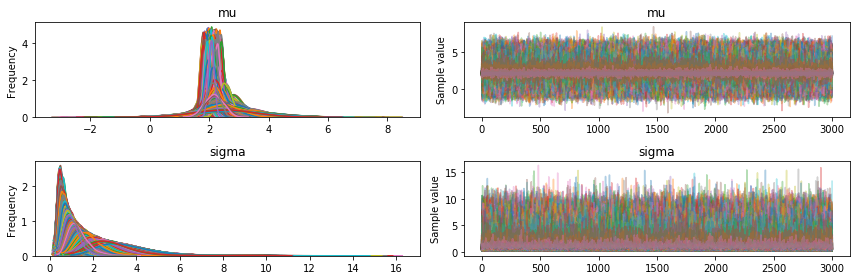

In [32]:
pm.traceplot(short_trace, varnames=['mu', 'sigma'])

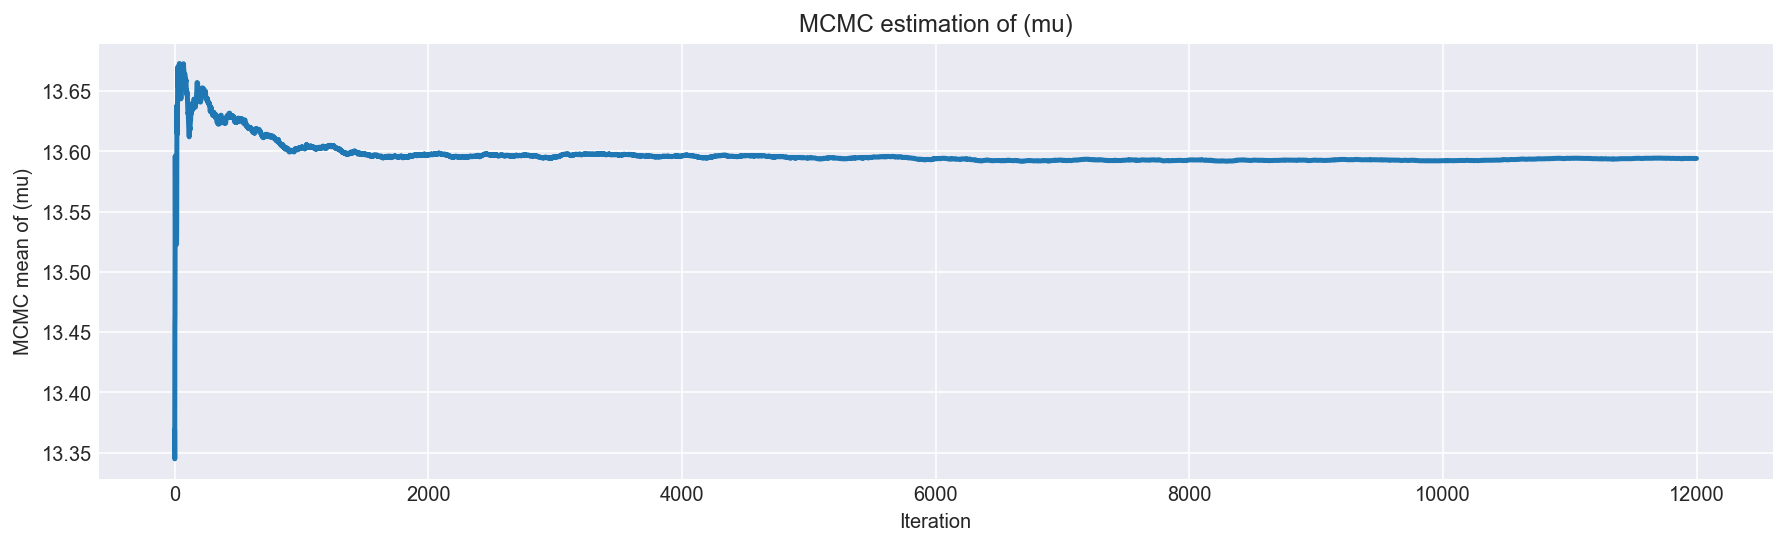

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

mu = np.exp(short_trace['mu'])
mmu = [np.mean(mu[:i]) for i in np.arange(1, len(mu))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(mmu, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (mu)')
plt.title('MCMC estimation of (mu)');

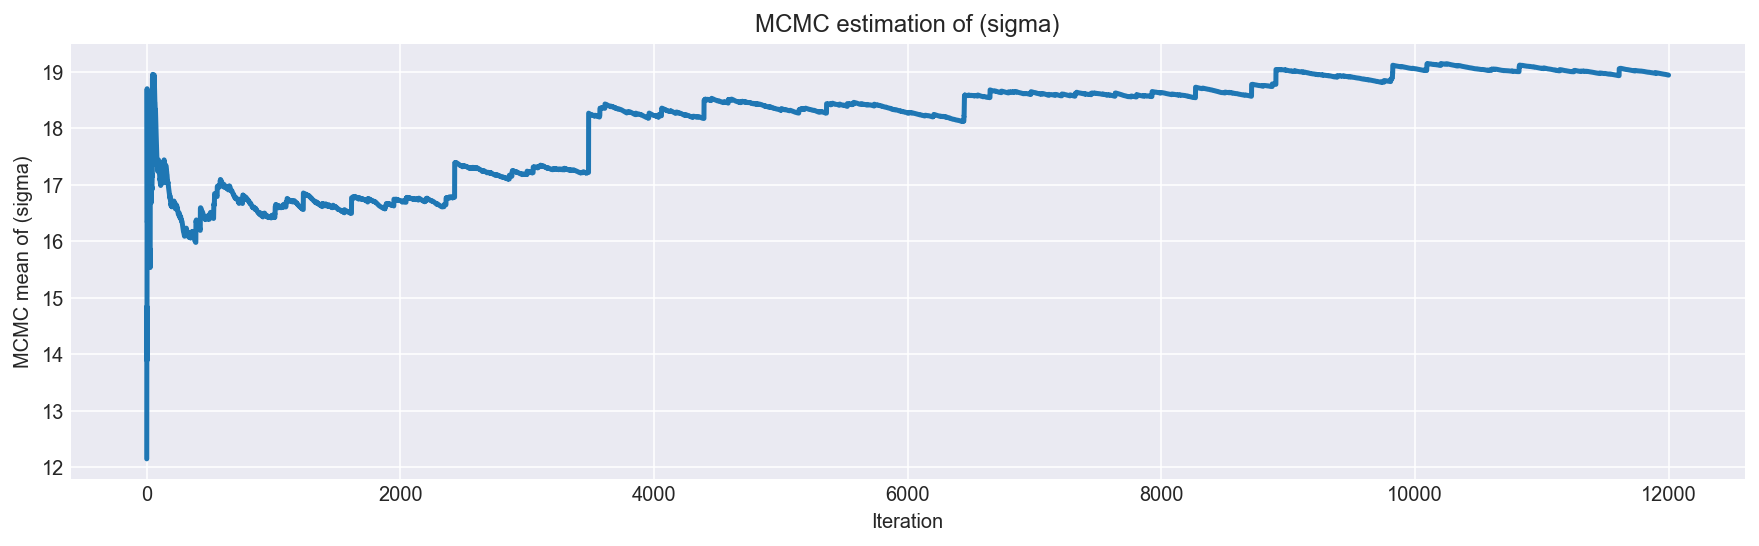

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

sigma = np.exp(short_trace['sigma'])
msigma = [np.mean(sigma[:i]) for i in np.arange(1, len(sigma))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(msigma, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (sigma)')
plt.title('MCMC estimation of (sigma)');